In [ ]:
!pip install kafka
!pip install kafka-python

     |████████████████████████████████| 207 kB 5.5 MB/s 
     |████████████████████████████████| 246 kB 5.4 MB/s 


Consumer 

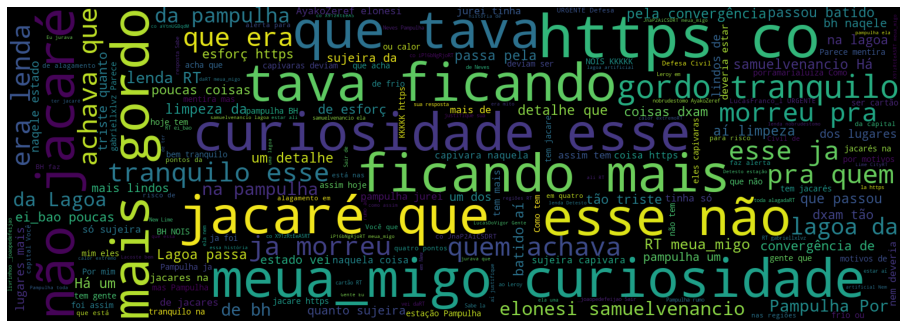

{'tweet': 'RT @meua_migo: curiosidade: esse não é o jacaré que tava ficando mais gordo e tranquilo (esse ja morreu)\n\ne pra quem achava que era lenda n…', 'horario': '2021-10-19 01:12:19'}


KeyboardInterrupt: ignored

In [ ]:
# importando as bibliotecas
from kafka import KafkaConsumer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json
from IPython.display import clear_output


#configuração do kafka
brokers = ['pkc-ldjyd.southamerica-east1.gcp.confluent.cloud:']
topic = 'pampulha'

while True:
  consumer = KafkaConsumer(topic, group_id = 'group2', bootstrap_servers=brokers, 
                          security_protocol='', 
                          sasl_mechanism='',
                          sasl_plain_username='',
                          sasl_plain_password='', 
                          api_version=(0, 10, 1),
                          auto_offset_reset='earliest')

  #geração da nuvem de palavras em tempo real
  frases = ''

  for messagem in consumer:
      texto = json.loads(messagem.value.decode('utf-8'))
      print(texto)
      frases = frases + texto['tweet']
      wordcloud = WordCloud(max_font_size=100, width = 1520, height = 535).generate(frases)
      clear_output()
      plt.figure(figsize=(16,9))
      plt.imshow(wordcloud)
      plt.axis("off")
      plt.show()